# Importing Libraries

In [ ]:
#importing_libraries
import numpy as np #Algebraic_Calculations
import pandas as pd  #DataFrame
import seaborn as sns  #Graph_plot
import matplotlib.pyplot as plt #Graph_Plot

# 1. About The Data

In [4]:
#Data_reading_using_csv_files => copy to dataframe
credit_df = pd.read_csv("./credit_customers.csv")
type(credit_df)

pandas.core.frame.DataFrame

# 2. Data Description

In [ ]:
credit_df.shape

###  Data Types of DataFrame

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### Checking If Null Value is Present or Not

In [108]:
#Checking the columns
credit_df.isnull().sum() #No null values in dataframe

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### Taking Sample Dataset with 21 Columns

In [26]:
credit_df.head(6)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good


In [12]:
#Will take a small dataset from the full dataset
sample_columns = ['checking_status', 'duration', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'personal_status', 
       'residence_since',  'age',
       'existing_credits', 'job', 'num_dependents', 'foreign_worker']
credit_sample = credit_df[sample_columns].copy() #Creating seperate dataframe for samples

credit_sample #This will be used for analyzation

,checking_status,duration,purpose,credit_amount,savings_status,employment,personal_status,residence_since,age,existing_credits,job,num_dependents,foreign_worker
0,<0,6.0,radio/tv,1169.0,no known savings,>=7,male single,4.0,67.0,2.0,skilled,1.0,yes
1,0<=X<200,48.0,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,2.0,22.0,1.0,skilled,1.0,yes
2,no checking,12.0,education,2096.0,<100,4<=X<7,male single,3.0,49.0,1.0,unskilled resident,2.0,yes
3,<0,42.0,furniture/equipment,7882.0,<100,4<=X<7,male single,4.0,45.0,1.0,skilled,2.0,yes
4,<0,24.0,new car,4870.0,<100,1<=X<4,male single,4.0,53.0,2.0,skilled,2.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,furniture/equipment,1736.0,<100,4<=X<7,female div/dep/mar,4.0,31.0,1.0,unskilled resident,1.0,yes
996,<0,30.0,used car,3857.0,<100,1<=X<4,male div/sep,4.0,40.0,1.0,high qualif/self emp/mgmt,1.0,yes
997,no checking,12.0,radio/tv,804.0,<100,>=7,male single,4.0,38.0,1.0,skilled,1.0,yes
998,<0,45.0,radio/tv,1845.0,<100,1<=X<4,male single,4.0,23.0,1.0,skilled,1.0,yes


# 3. Exploratory Data Visualization

## Purposes Of Taking Credit

UsageError: Line magic function `%%capture` not found.


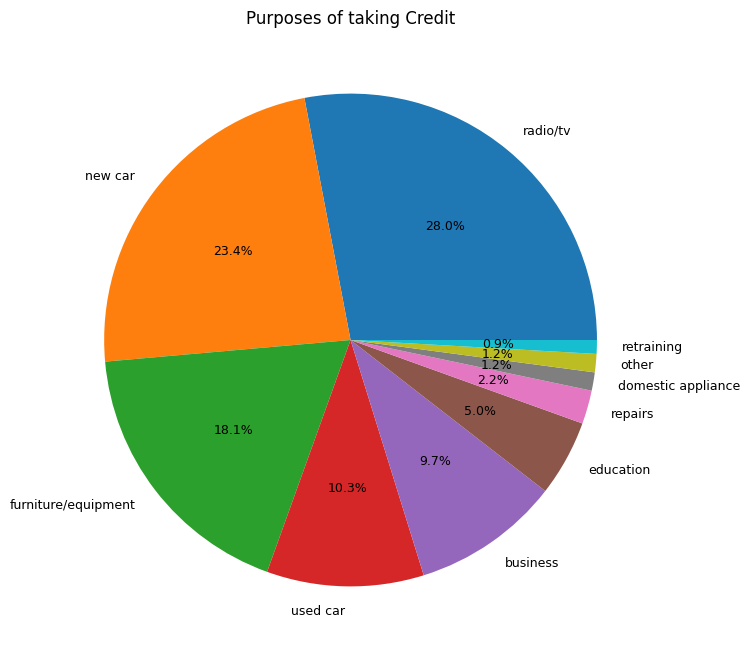

In [13]:
#creating another dataframe containing the counts of all unique purposessam
purpose_counts = credit_sample.purpose.value_counts() #creating an object

#Pie chart containing the Percentage of 'Purposes of taking Credit'
plt.figure(figsize = (8, 8))
plt.title('Purposes of taking Credit')
plt.rcParams['font.size'] = 9
plt.pie(purpose_counts, labels = purpose_counts.index, autopct='%1.1f%%')
%%capture

## Credit Amount and Age Relation

<Axes: title={'center': 'Scatter Diagram of Credit Amount Vs Age'}, xlabel='age', ylabel='credit_amount'>

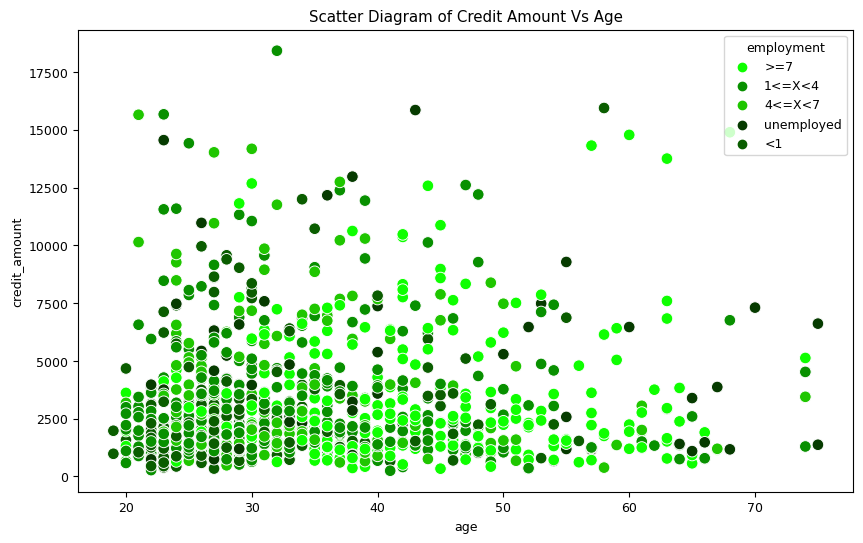

In [221]:
plt.figure(figsize = (10, 6))
plt.title('Scatter Diagram of Credit Amount Vs Age')
sns.scatterplot(data=credit_sample, x='age', y='credit_amount', hue = credit_sample.employment, s= 70, palette=['#0eff00','#089000', '#1fc600', '#063b00', '#0a5d00'], legend='full', )

## Count Of Different Age Holders

UsageError: Line magic function `%%capture` not found.


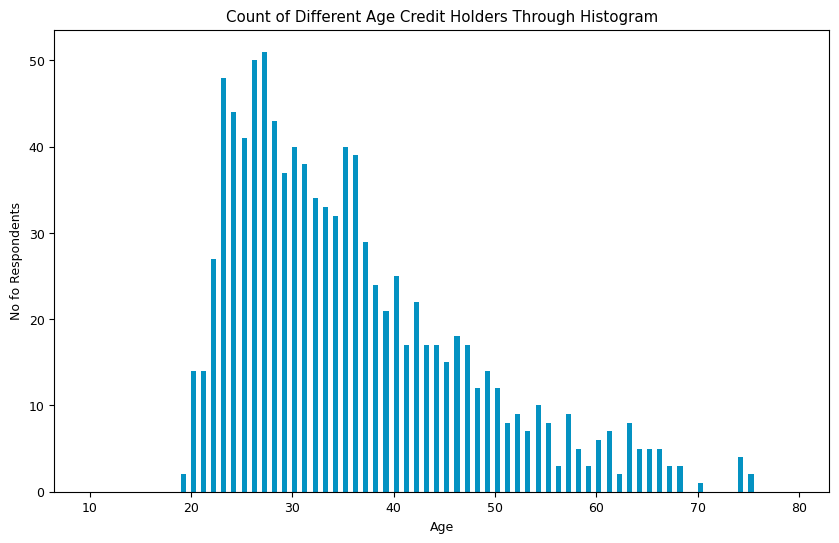

In [53]:
# Count of Different Age Credit Holders Through Histogram
plt.figure(figsize = (10, 6))
plt.title('Count of Different Age Credit Holders Through Histogram')
plt.xlabel('Age')
plt.ylabel('No fo Respondents')
plt.hist(credit_sample.age, bins = np.arange(10, 80, 0.5), color = '#0492C2')
%%capture

## Different People Credit Duration

<Axes: title={'center': 'Bar Plot of Average Duration of Credit for Different People'}, xlabel='personal_status', ylabel='duration'>

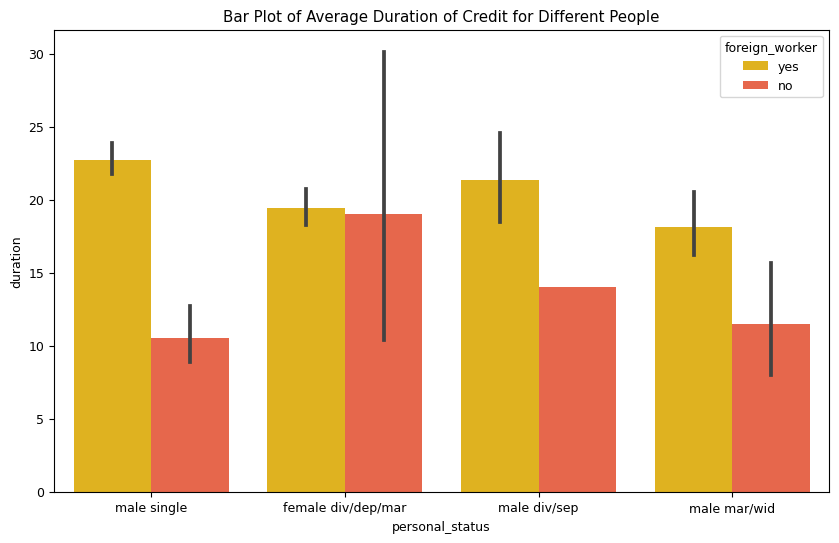

In [92]:
# Bar Plot of Average Duration of Credit for Different People
plt.figure(figsize = (10, 6))
plt.title('Bar Plot of Average Duration of Credit for Different People')
sns.barplot(x=credit_sample.personal_status, y=credit_sample.duration, hue = 'foreign_worker' , data=credit_sample, palette =['#FFC300', '#FF5733'])

## Details Of Job Holders

UsageError: Line magic function `%%capture` not found.


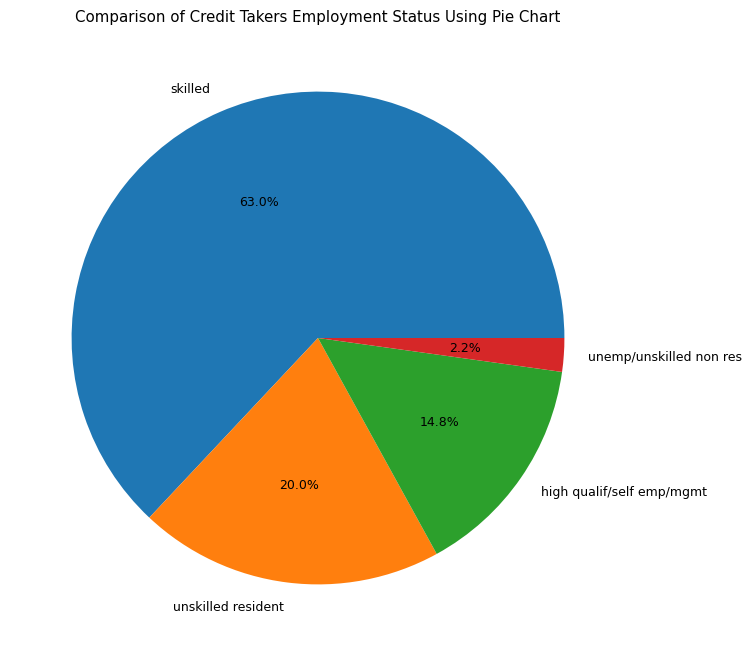

In [89]:
# Creating An Object Containing Counbt of All Jobs
job_df = credit_sample.job.value_counts()

#Comparison of Credit Takers Employment Status Using Pie Chart'
plt.figure(figsize = (8, 8))
plt.title('Comparison of Credit Takers Employment Status Using Pie Chart')
plt.rcParams['font.size'] = 9
plt.pie(job_df, labels = job_df.index, autopct='%1.1f%%')
%%capture

## Comparison of Avg. Credit Amount of Different People

<Axes: title={'center': 'Bar Plot of Average Credit Amount of Different People'}, xlabel='personal_status', ylabel='credit_amount'>

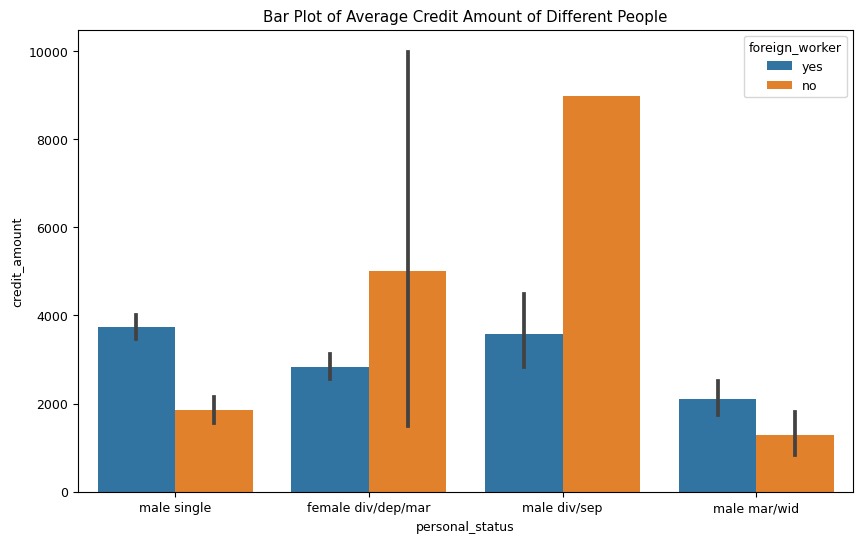

In [234]:
#creating another dataframe containing the average Credit takedn by different people
plt.figure(figsize = (10, 6))
plt.title('Bar Plot of Average Credit Amount of Different People')
sns.barplot(x='personal_status', y='credit_amount', hue = 'foreign_worker' , data=credit_sample)

## Credit Takers Employment Status

UsageError: Line magic function `%%capture` not found.


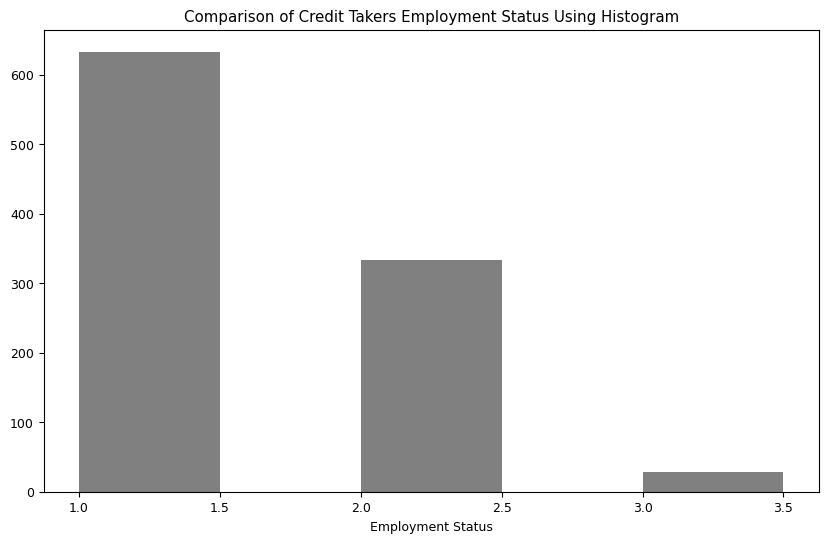

In [86]:
plt.figure(figsize = (10, 6))
plt.title('Comparison of Credit Takers Employment Status Using Histogram')
plt.xlabel('Employment Status')
plt.hist(credit_sample.existing_credits, bins = np.arange(1.0, 4.0, 0.5), color ='grey')
%%capture

# Conclusion

* The Major Reason for taking Credit is to Buy Electronic Gadgets.
* Only 5% Customers took Credit for Educational purpose and approx 28% people took credit for Business purpose.

* Most of the credit Takers are aged between 20 tyo 40 and the majority money lended is betwwen 5000/-, customers avg income is between 1 to 7 lakh per annum range.
* Single male customers have taken credits for long duration amoung all customers and between them, foreign workers are on the top of the list.
* 63% of the customers are Skilled Professionals.
* Male div/sep, who are not foreign workers, have maximum avg. Credit Amount.